### Instalasi PySpark

In [2]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 43.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=67e911beae3e23ad037027bb0bf4e24f4711501964d68987673bf00322eb286a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


### Pembuatan spark session

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('uas_pyspark').getOrCreate()

spark

# **Proses EDA menggunakan PySpark terhadap dataset**

### Pembacaan dataset

In [28]:
from google.colab import drive

drive.mount('/content/drive')

df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/dataset/rice.csv', header = True, inferSchema = True)

df.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+---+----+---------------+---------------+------------+----------+-------------+------------+---------+------------+------------+-----+
| id|Area|MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|EquivDiameter|      Extent|Perimeter|   Roundness|AspectRation|Class|
+---+----+---------------+---------------+------------+----------+-------------+------------+---------+------------+------------+-----+
|  1|4537|     92.2293165|    64.01276874|0.7199162256|      4677|  76.00452496|0.6575362319|  273.085|0.7645096145| 1.440795615|    1|
|  2|2872|    74.69188071|    51.40045446|0.7255527468|      3015|  60.47101762|0.7130089374|  208.317|0.8316582009| 1.453136582|    1|
|  3|3048|     76.2931638|    52.04349114|0.7312109273|      3132|  62.29634124|0.7591531756|  210.012|0.8684335737| 1.465950153|    1|
|  4|3073|    77.03362772|    51.92848667|0.7386386945|

### Melihat tipe data dari setiap kolom

In [29]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: integer (nullable = true)
 |-- EquivDiameter: double (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- Roundness: double (nullable = true)
 |-- AspectRation: double (nullable = true)
 |-- Class: integer (nullable = true)



### Menampilkan nama kolom, jumlah baris, dan jumlah kolom

In [30]:
# Menampilkan nama kolom
print('Nama kolom   : ', df.columns)

# Menampilkan jumlah baris
print('Jumlah baris : ',df.count())

# Menampilkan jumlah kolom
print('Jumlah kolom : ',len(df.columns))

Nama kolom   :  ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation', 'Class']
Jumlah baris :  18185
Jumlah kolom :  12


### Menampilkan statistik data pada setiap kolom

In [31]:
df.describe().show()

+-------+----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-------------------+------------------+-------------------+
|summary|              id|              Area|   MajorAxisLength|   MinorAxisLength|        Eccentricity|        ConvexArea|    EquivDiameter|             Extent|         Perimeter|          Roundness|      AspectRation|              Class|
+-------+----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-------------------+------------------+-------------------+
|  count|           18185|             18185|             18185|             18185|               18185|             18185|            18185|              18185|             18185|              18185|             18185|              18185|
|   mean|          9093.0| 7036.49298872

### Untuk mengetahui apabila terdapat missing value dari dataframe

In [32]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----+---------------+---------------+------------+----------+-------------+------+---------+---------+------------+-----+
| id|Area|MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|EquivDiameter|Extent|Perimeter|Roundness|AspectRation|Class|
+---+----+---------------+---------------+------------+----------+-------------+------+---------+---------+------------+-----+
|  0|   0|              0|              0|           0|         0|            0|     0|        0|        0|           0|    0|
+---+----+---------------+---------------+------------+----------+-------------+------+---------+---------+------------+-----+



Tidak terdapat missing value dari dataframe tersebut

### Melihat nilai korelasi antara setiap kolom

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df2 = df.toPandas()
df2.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


### Melakukan drop terhadap kolom yang tidak diperlukan

In [43]:
df = df.drop("id")
df.show()

+----+---------------+---------------+------------+----------+-------------+------------+---------+------------+------------+-----+
|Area|MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|EquivDiameter|      Extent|Perimeter|   Roundness|AspectRation|Class|
+----+---------------+---------------+------------+----------+-------------+------------+---------+------------+------------+-----+
|4537|     92.2293165|    64.01276874|0.7199162256|      4677|  76.00452496|0.6575362319|  273.085|0.7645096145| 1.440795615|    1|
|2872|    74.69188071|    51.40045446|0.7255527468|      3015|  60.47101762|0.7130089374|  208.317|0.8316582009| 1.453136582|    1|
|3048|     76.2931638|    52.04349114|0.7312109273|      3132|  62.29634124|0.7591531756|  210.012|0.8684335737| 1.465950153|    1|
|3073|    77.03362772|    51.92848667|0.7386386945|      3157|  62.55129991|0.7835288118|  210.657|0.8702031163|  1.48345605|    1|
|3693|    85.12478457|    56.37402054|0.7492815788|      3802|   68.5716679|

#**Visualisasi Data**

### Menampilkan graph kernel density estimation terhadap class dengan aspect ratio

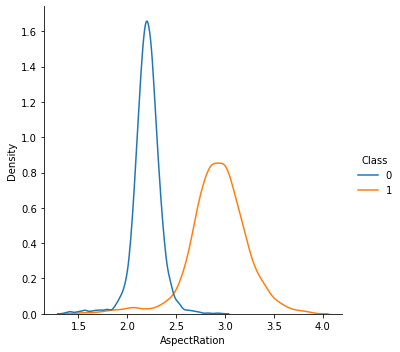

In [46]:
sns.displot(data=df2, x="AspectRation", kind='kde', hue='Class');

### Menampilkan scatterplot dari data

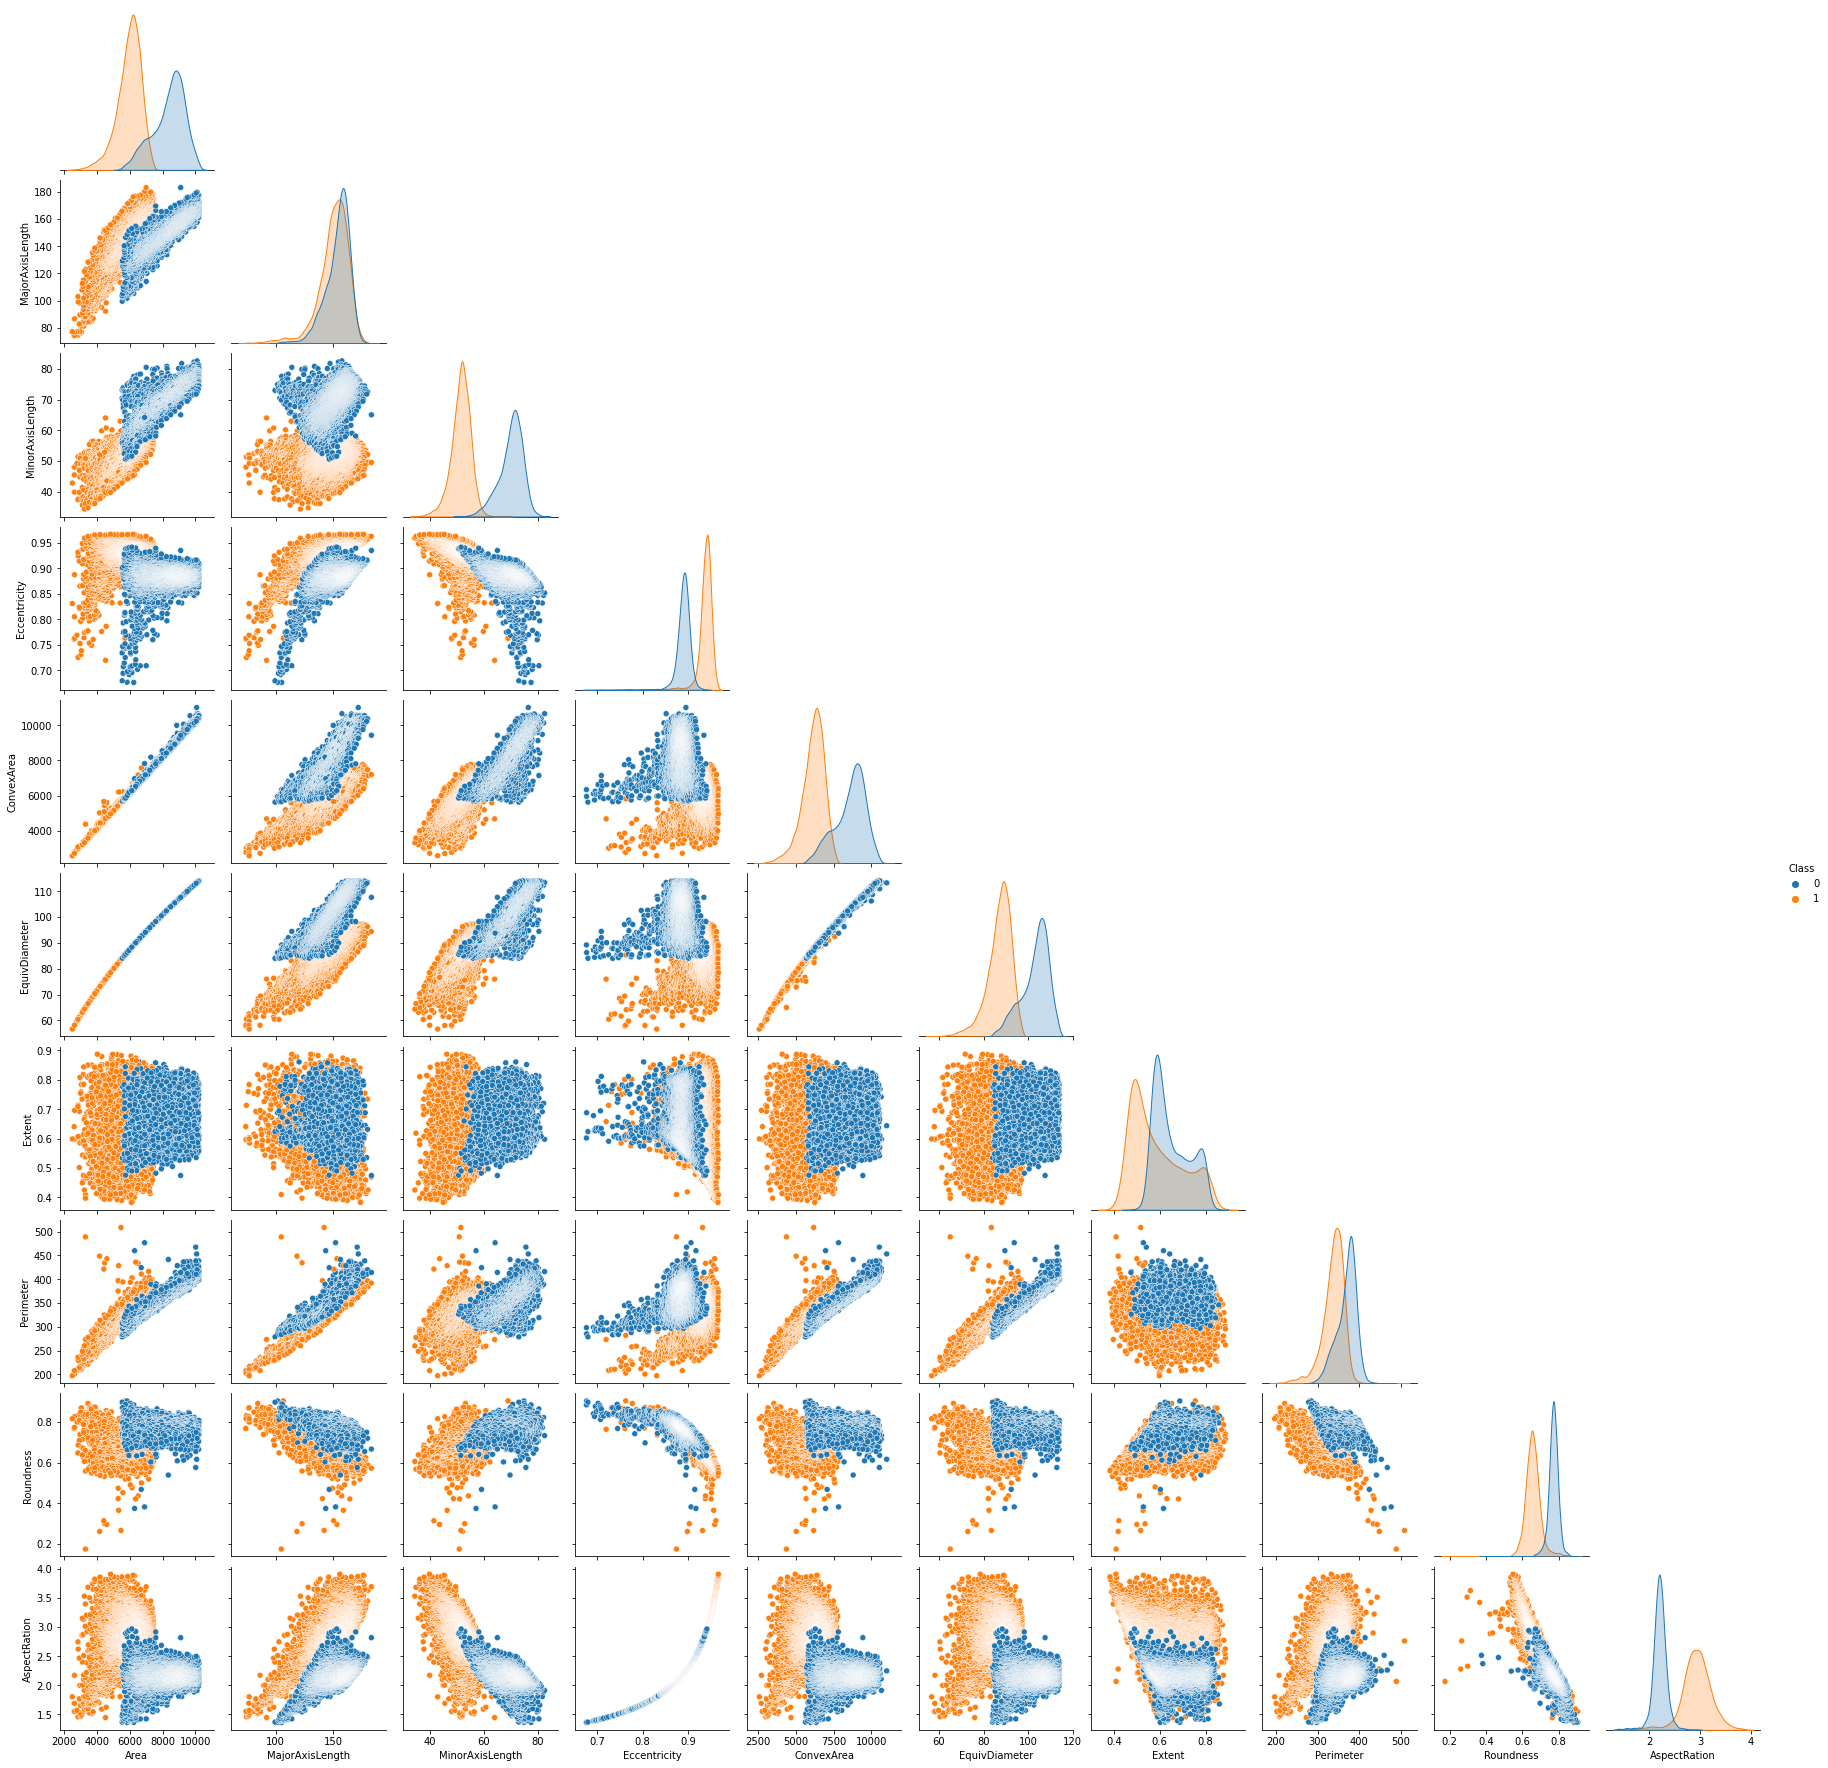

In [49]:
sns.pairplot(hue='Class', 
             vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation'], 
             data=df2, 
             corner=True)

### Melihat perbandingan persebaran data

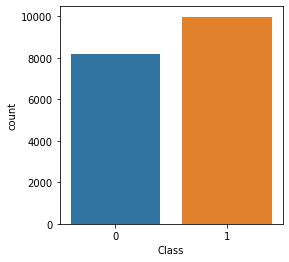

In [51]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Class', data = df2)
plt.show()

# **Proses data modeling menggunakan Logistic Regression**

### Pengelompokan data berdasarkan fitur dan label

In [53]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.ml.feature import *

In [58]:
assembler = VectorAssembler(inputCols=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']
                            , outputCol='feature')
df = assembler.transform(df)

df.select('feature', 'Class').show(10, truncate=False)

+--------------------------------------------------------------------------------------------------------------+-----+
|feature                                                                                                       |Class|
+--------------------------------------------------------------------------------------------------------------+-----+
|[4537.0,92.2293165,64.01276874,0.7199162256,4677.0,76.00452496,0.6575362319,273.085,0.7645096145,1.440795615] |1    |
|[2872.0,74.69188071,51.40045446,0.7255527468,3015.0,60.47101762,0.7130089374,208.317,0.8316582009,1.453136582]|1    |
|[3048.0,76.2931638,52.04349114,0.7312109273,3132.0,62.29634124,0.7591531756,210.012,0.8684335737,1.465950153] |1    |
|[3073.0,77.03362772,51.92848667,0.7386386945,3157.0,62.55129991,0.7835288118,210.657,0.8702031163,1.48345605] |1    |
|[3693.0,85.12478457,56.37402054,0.7492815788,3802.0,68.5716679,0.769375,230.332,0.8747432792,1.51000024]      |1    |
|[2990.0,77.41707342,50.9543441,0.7528608886,308

### Melakukan pembagian data latih dengan data uji, dengan rasio 3:1

In [59]:
training, testing = df.randomSplit([0.75, 0.25], seed=42)
ratio = training.count() / df.count()
print(ratio)

0.7516634588946934


### Proses fitting menggunakan algoritma logistic regression 

In [66]:
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

lr = LogisticRegression(labelCol="Class", featuresCol="feature", regParam=0.1, elasticNetParam=1.0, maxIter=500)
model_lr = lr.fit(training)

prediction = model_lr.transform(testing)
prediction.select('Class', 'prediction', 'probability').show(5, False)

+-----+----------+-----------------------------------------+
|Class|prediction|probability                              |
+-----+----------+-----------------------------------------+
|1    |1.0       |[0.08098417342966718,0.9190158265703328] |
|1    |1.0       |[0.009821017921572979,0.990178982078427] |
|1    |1.0       |[0.012031811114100168,0.9879681888858999]|
|1    |1.0       |[0.019101040615269058,0.9808989593847309]|
|1    |1.0       |[0.17505324208029785,0.8249467579197022] |
+-----+----------+-----------------------------------------+
only showing top 5 rows



### Perhitungan akurasi model

In [70]:
prediction.groupBy('Class', 'prediction').count().show()

TN = prediction.filter('prediction = 0 AND Class = prediction').count()
TP = prediction.filter('prediction = 1 AND Class = prediction').count()
FN = prediction.filter('prediction = 0 AND Class != prediction').count()
FP = prediction.filter('prediction = 1 AND Class != prediction').count()

accuracy = (TN + TP) / (TN + TP + FN + FP)
print("akurasi = ", accuracy)

+-----+----------+-----+
|Class|prediction|count|
+-----+----------+-----+
|    1|       0.0|    4|
|    0|       0.0| 2012|
|    1|       1.0| 2426|
|    0|       1.0|   74|
+-----+----------+-----+

akurasi =  0.9827280779450841


Diperoleh akurasi sebesar 98%

### Menampilkan confusion matrix dari hasil prediksi

In [68]:
y_true = prediction.select("Class").collect()
y_pred = prediction.select("prediction").collect()

print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2086
           1       0.97      1.00      0.98      2430

    accuracy                           0.98      4516
   macro avg       0.98      0.98      0.98      4516
weighted avg       0.98      0.98      0.98      4516



array([[2012,   74],
       [   4, 2426]])

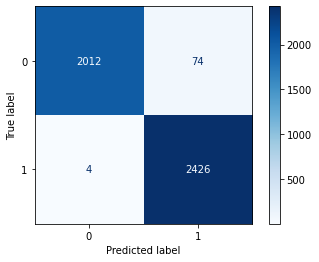

In [69]:
display = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=[0,1])
display.plot(cmap=plt.cm.Blues)
plt.show()